In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('500325.csv')
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,29-December-2023,2608.05,2614.80,2579.15,2584.85,2587.234179,848448,42547,2.195134e+09,130653.0,15.40,35.65,-23.20
1,28-December-2023,2587.00,2611.35,2587.00,2605.80,2603.866737,183810,10929,4.786167e+08,76669.0,41.71,24.35,18.80
2,27-December-2023,2578.50,2599.35,2572.25,2586.35,2587.593434,103806,8408,2.686077e+08,52489.0,50.56,27.10,7.85
3,26-December-2023,2570.00,2592.90,2563.00,2577.50,2579.756103,90284,8523,2.329107e+08,43665.0,48.36,29.90,7.50
4,22-December-2023,2562.20,2580.55,2548.00,2564.70,2562.542998,524558,21877,1.344202e+09,52406.0,9.99,32.55,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,11-January-1991,102.50,110.00,100.00,108.75,0.000000,0,0,0.000000e+00,NaN,NaN,10.00,6.25
8246,9-January-1991,105.00,105.00,101.25,102.50,0.000000,0,0,0.000000e+00,NaN,NaN,3.75,-2.50
8247,7-January-1991,105.00,107.50,97.50,105.00,0.000000,0,0,0.000000e+00,NaN,NaN,10.00,0.00
8248,3-January-1991,107.50,107.50,95.00,97.50,0.000000,0,0,0.000000e+00,NaN,NaN,12.50,-10.00


In [6]:
df=df[::-1]
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,2-January-1991,115.0,115.0,105.00,107.50,0.0,0,0,0.0,NaN,NaN,10.00,-7.50
1,3-January-1991,107.5,107.5,95.00,97.50,0.0,0,0,0.0,NaN,NaN,12.50,-10.00
2,7-January-1991,105.0,107.5,97.50,105.00,0.0,0,0,0.0,NaN,NaN,10.00,0.00
3,9-January-1991,105.0,105.0,101.25,102.50,0.0,0,0,0.0,NaN,NaN,3.75,-2.50
4,11-January-1991,102.5,110.0,100.00,108.75,0.0,0,0,0.0,NaN,NaN,10.00,6.25


In [8]:
df.drop(df.columns[[1,2,3,5,7,8,9,10,11,12]],axis=1,inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['month']= df['Date'].dt.month
df.head()

,Date,Close Price,No.of Shares,Year,month
0,1991-01-02,107.50,0,1991,1
1,1991-01-03,97.50,0,1991,1
2,1991-01-07,105.00,0,1991,1
3,1991-01-09,102.50,0,1991,1
4,1991-01-11,108.75,0,1991,1


In [10]:
df.isnull().sum()

Date            0
Close Price     0
No.of Shares    0
Year            0
month           0
dtype: int64

In [12]:
df['Volume']=df['No.of Shares']
df.drop('No.of Shares',axis=1,inplace=True)
df.isnull().sum()

Date           0
Close Price    0
Year           0
month          0
Volume         0
dtype: int64

In [14]:
df

,Date,Close Price,Year,month,Volume
0,1991-01-02,107.50,1991,1,0
1,1991-01-03,97.50,1991,1,0
2,1991-01-07,105.00,1991,1,0
3,1991-01-09,102.50,1991,1,0
4,1991-01-11,108.75,1991,1,0
...,...,...,...,...,...
8245,2023-12-22,2564.70,2023,12,524558
8246,2023-12-26,2577.50,2023,12,90284
8247,2023-12-27,2586.35,2023,12,103806
8248,2023-12-28,2605.80,2023,12,183810


In [16]:
df[['Volume','Close Price']].describe()

,Volume,Close Price
count,8.250000e+03,8250.000000
mean,1.804710e+06,908.679927
std,7.996243e+06,731.499763
min,0.000000e+00,91.250000
25%,2.498165e+05,288.462500
50%,6.748610e+05,813.225000
75%,2.072138e+06,1211.787500
max,3.973114e+08,3216.300000


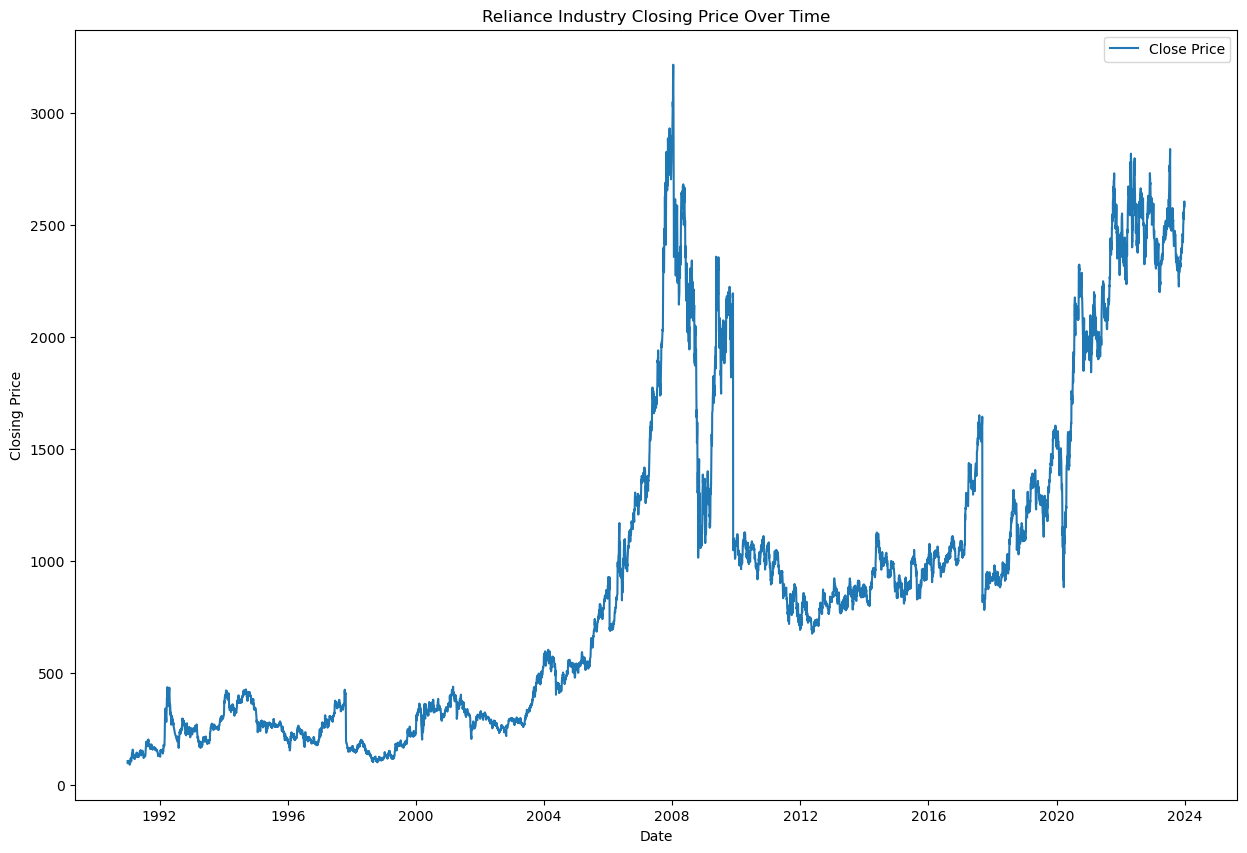

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df['Date'],df['Close Price'],label='Close Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Reliance Industry Closing Price Over Time')
plt.legend()
plt.show()

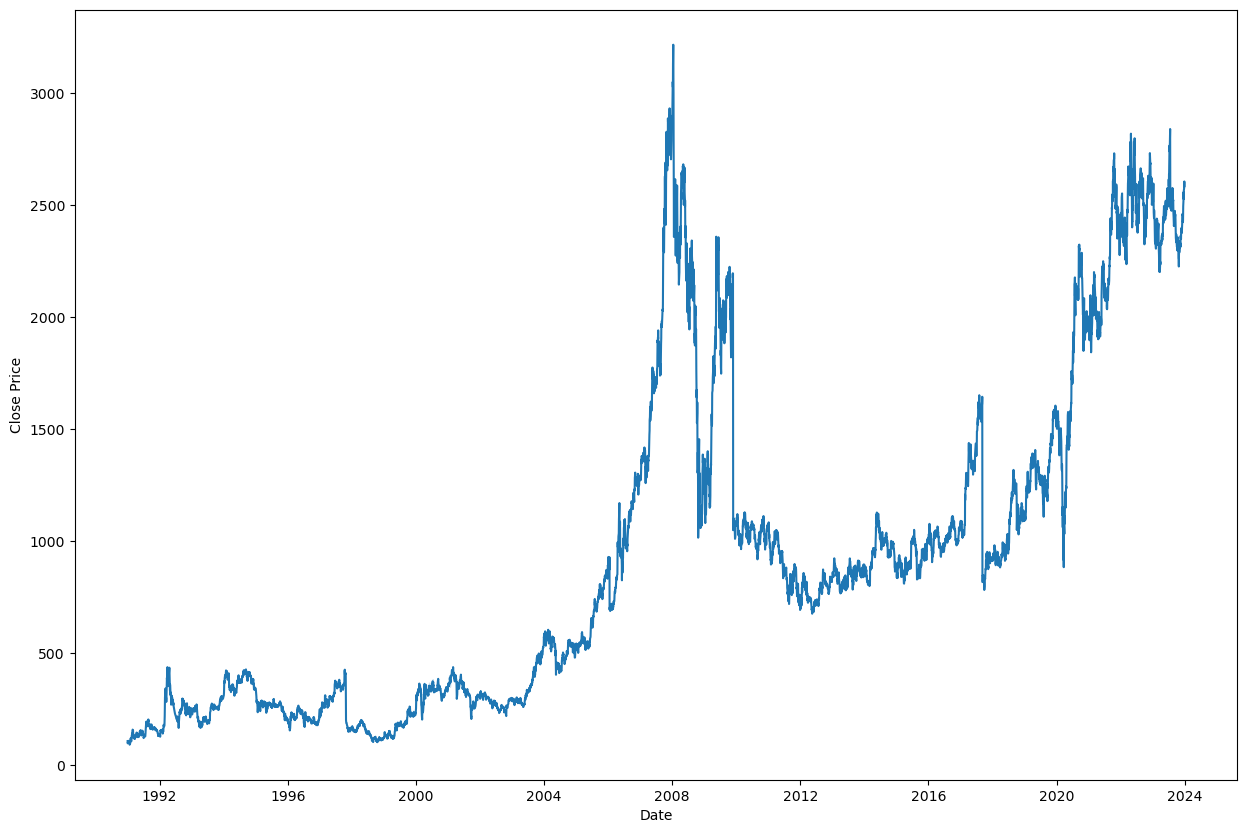

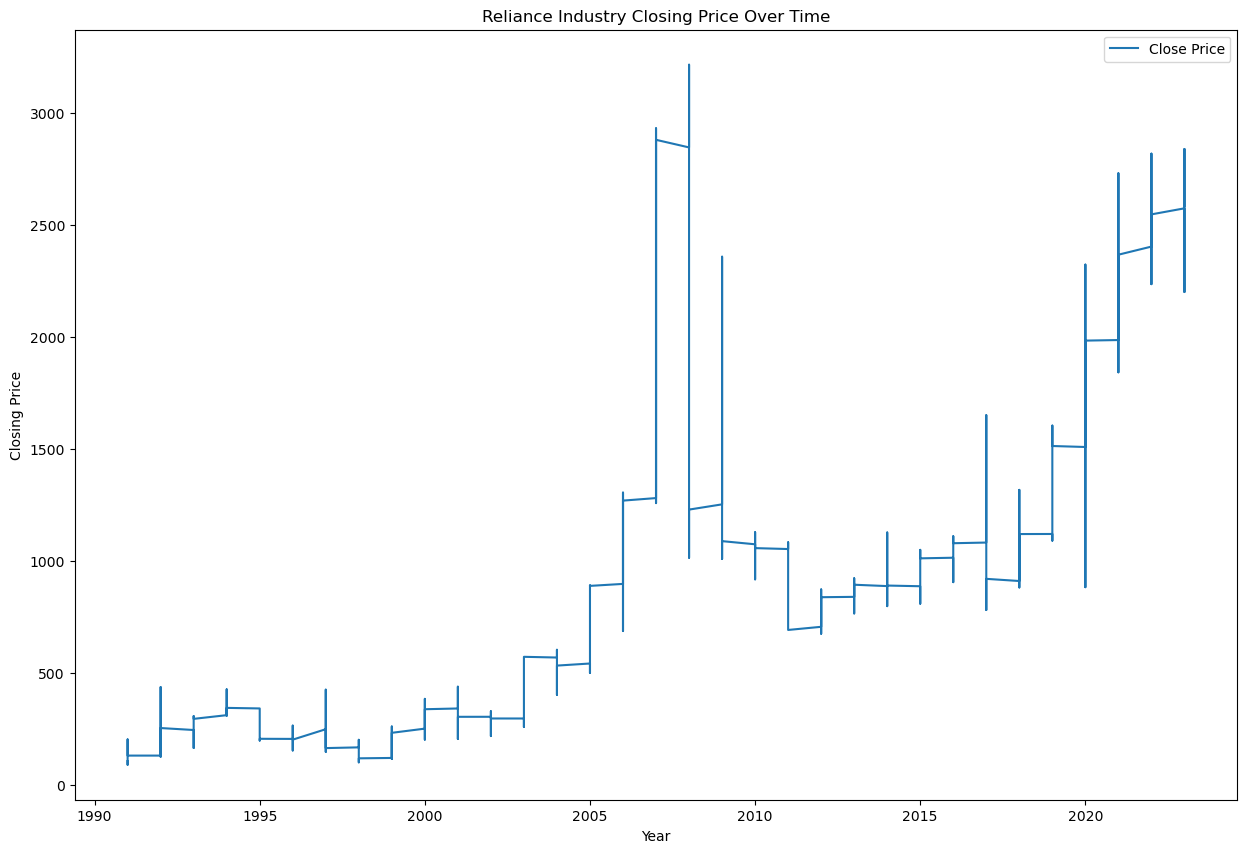

In [19]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.lineplot(x="Date",y="Close Price",data=df)

plt.figure(figsize=(15,10))
plt.plot(df['Year'],df['Close Price'],label='Close Price')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Reliance Industry Closing Price Over Time')
plt.legend()
plt.show()

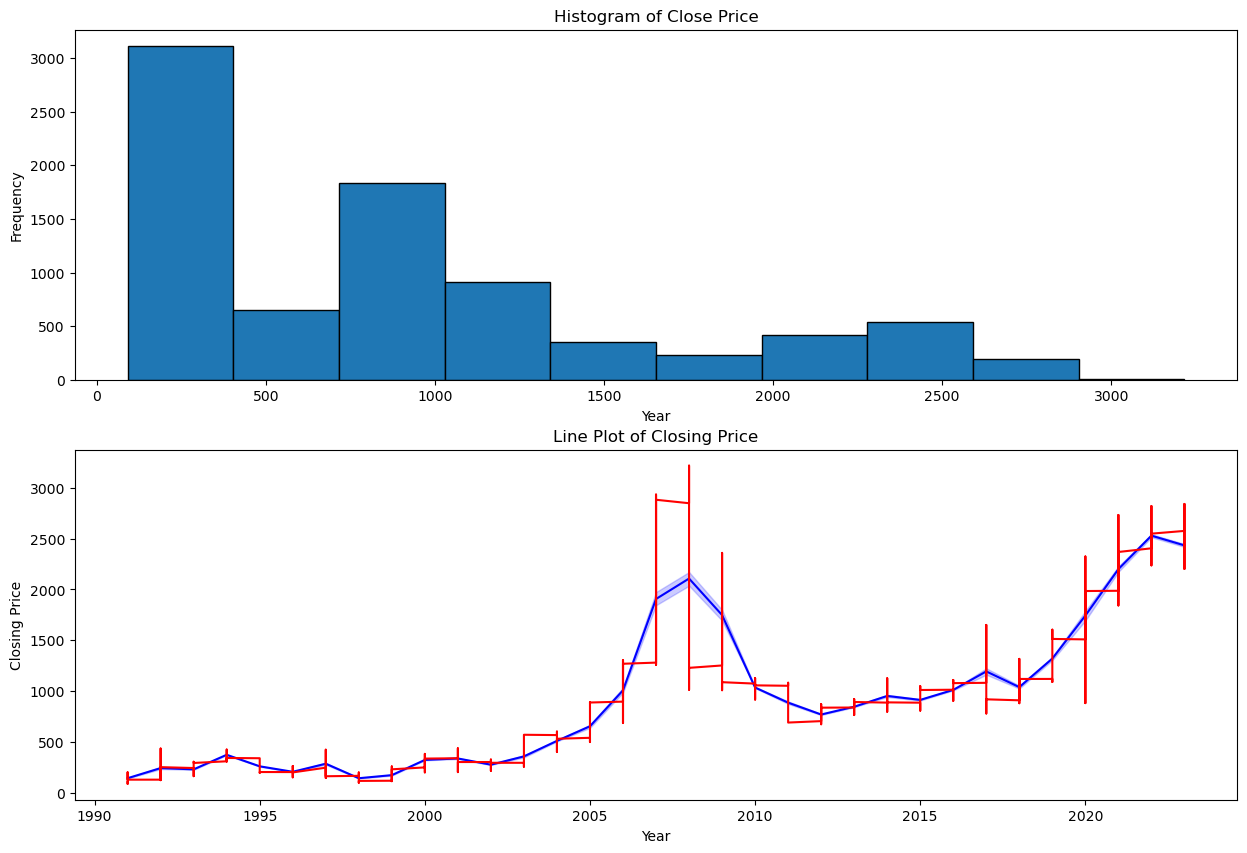

In [20]:
# Create a figure with two subplots.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot the histogram on the first subplot.
ax1.hist(df['Close Price'], bins=10, edgecolor='black')
sns.lineplot(x="Year",y="Close Price",data=df,color='blue')
# ax1.plot(df['Year'], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Close Price')

# Plot the line plot on the second subplot.
ax2.plot(df['Year'], df['Close Price'], color='red')
ax2.set_xlabel('Year')
ax2.set_ylabel('Closing Price')
ax2.set_title('Line Plot of Closing Price')

# Show the figure.
plt.show()

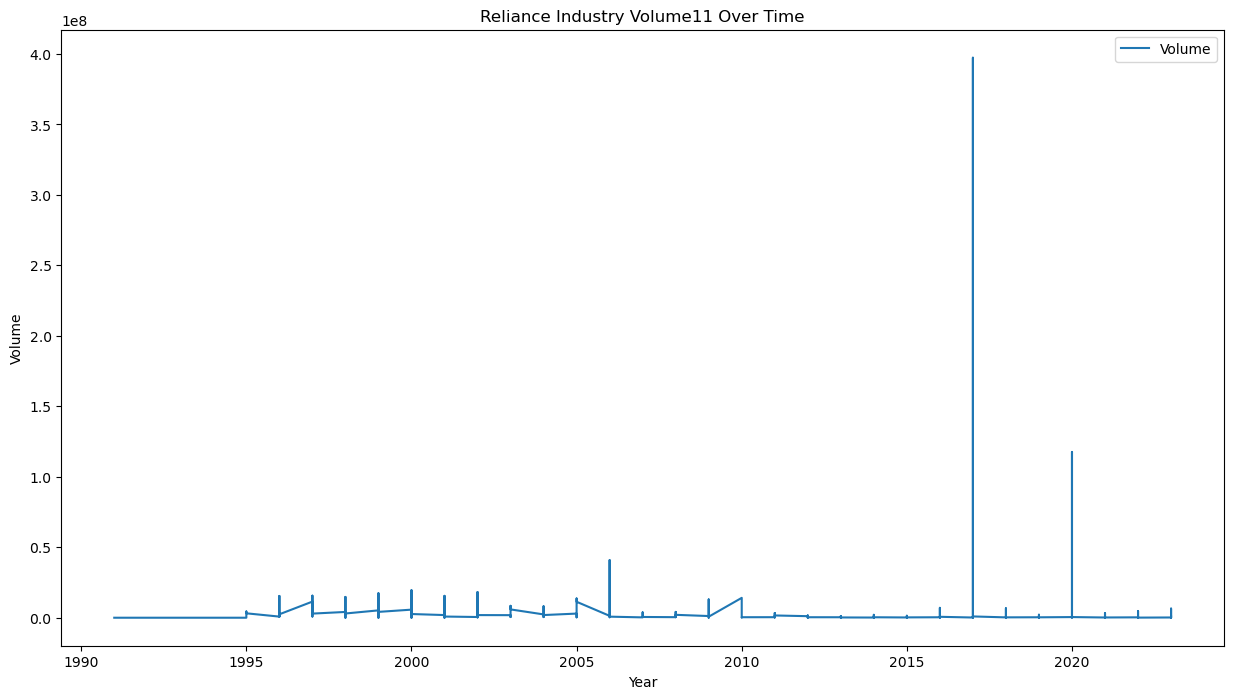

In [21]:
plt.figure(figsize=(15,8))
plt.plot(df['Year'],df['Volume'],label='Volume')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Reliance Industry Volume11 Over Time')
plt.legend()
plt.show()

<Axes: xlabel='Year', ylabel='Close Price'>

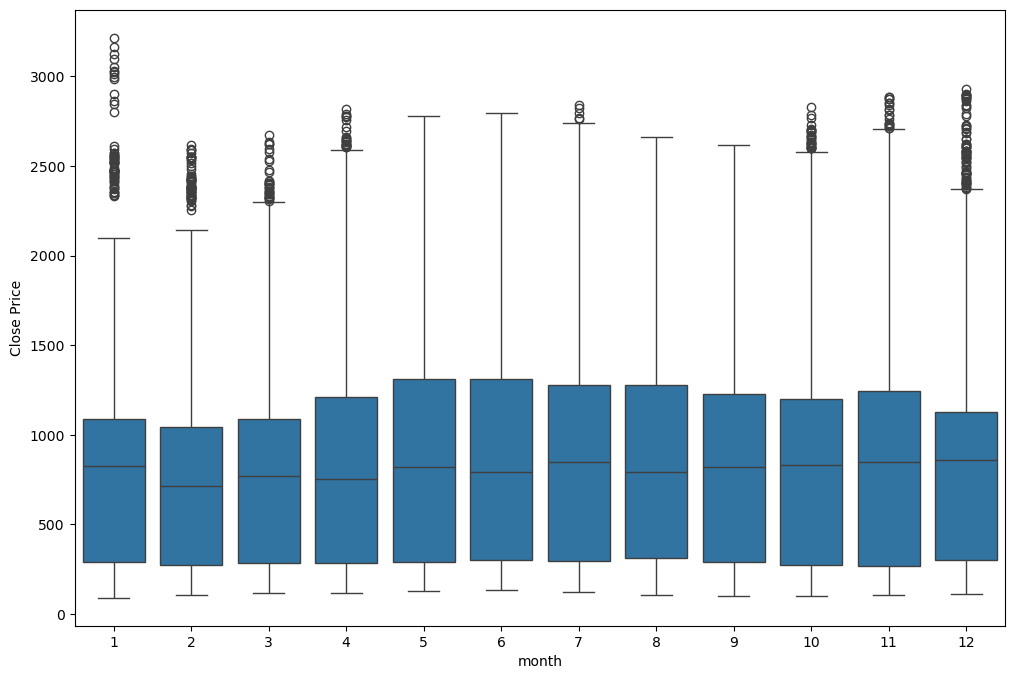

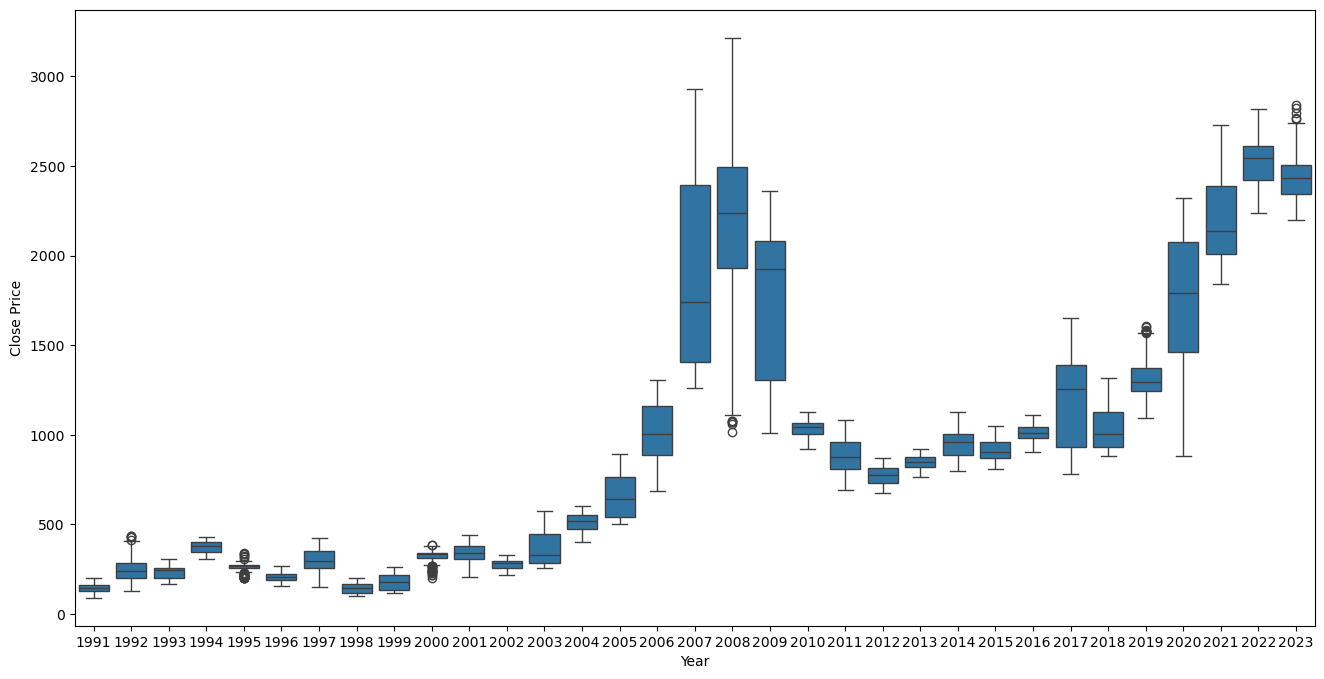

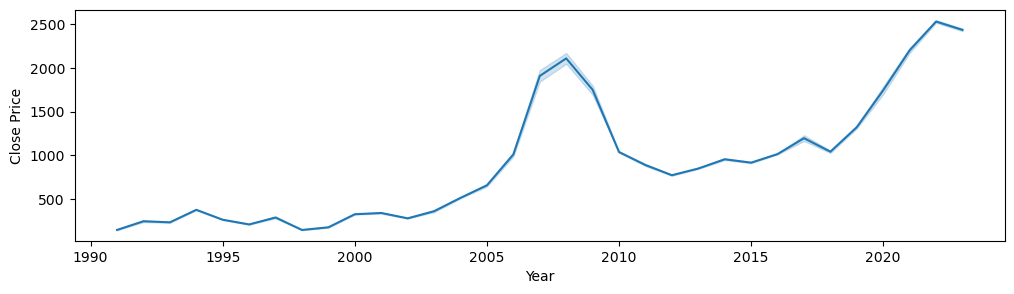

In [23]:
# Boxplot for every month
plt.figure(figsize=(12,8))
sns.boxplot(x="month",y="Close Price",data=df)

# Boxplot for every year
plt.figure(figsize=(16,8))
sns.boxplot(x="Year",y="Close Price",data=df)

# line plot for every year
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Close Price",data=df)

<Axes: xlabel='month', ylabel='Year'>

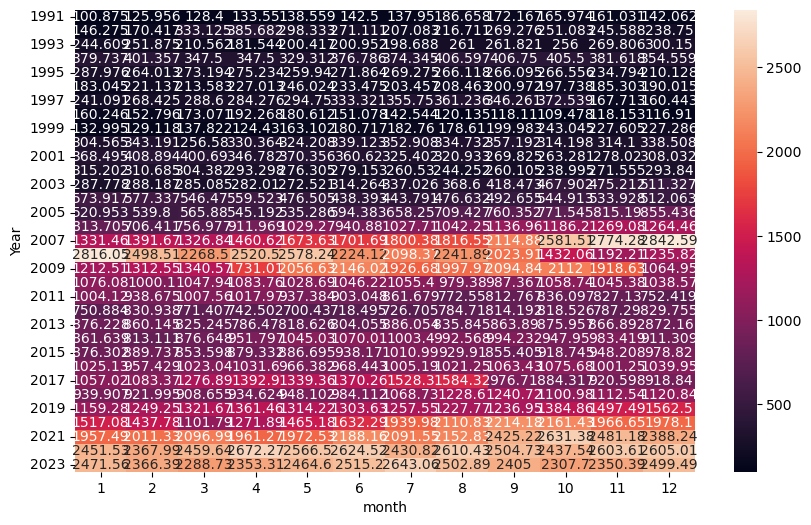

In [24]:
heatmap_y_month = pd.pivot_table(data=df,values="Close Price",index="Year",columns="month",fill_value=0)
heatmap_y_month

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<Figure size 4000x1000 with 0 Axes>

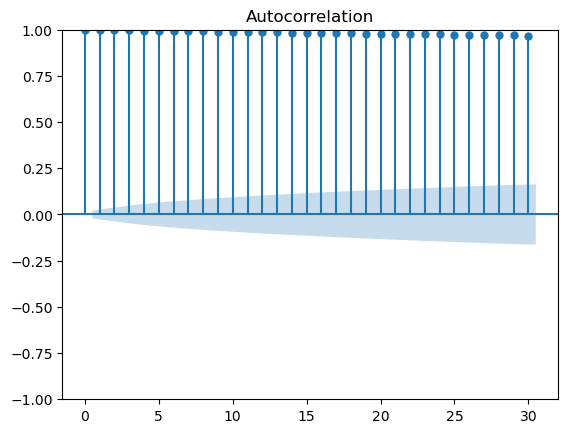

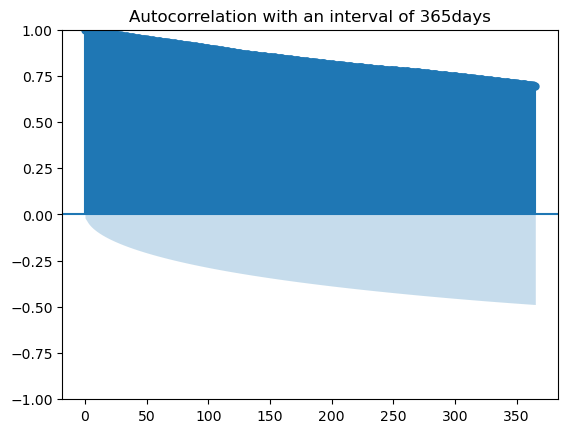

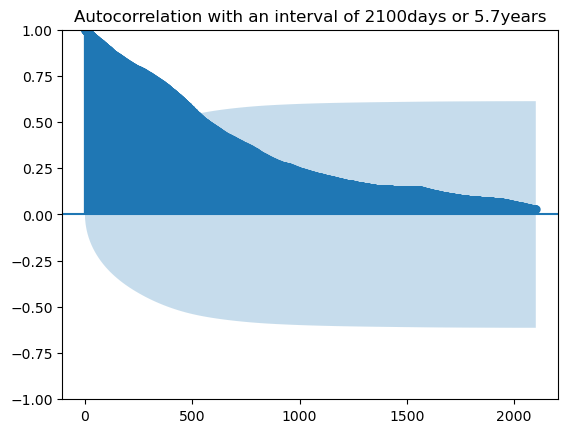

In [25]:
# create an autocorrelation plot
from matplotlib import pyplot
pyplot.figure(figsize = (40,10))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["Close Price"],lags=30) # for 30 days
pyplot.show()

plot_acf(df["Close Price"],lags=365) #for 365 days or 1year
pyplot.title('Autocorrelation with an interval of 365days')

plot_acf(df["Close Price"],lags=2100) #for 2100 days or 5.7 years
pyplot.title('Autocorrelation with an interval of 2100days or 5.7years')
pyplot.show()

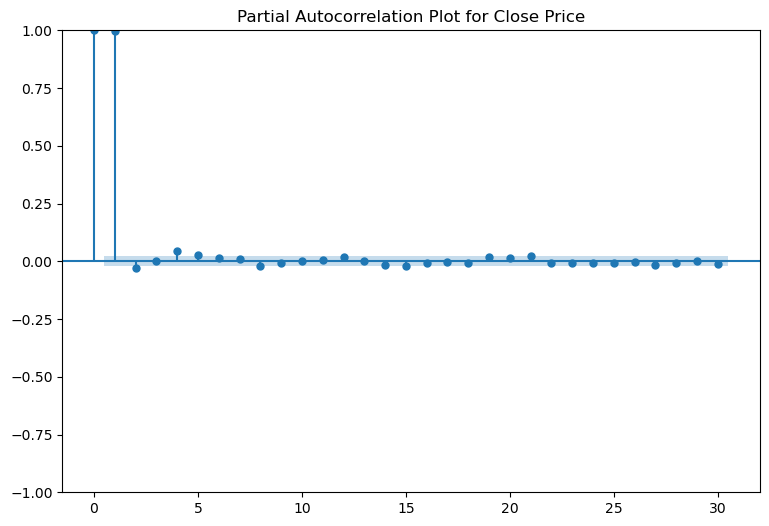

In [26]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Create a partial autocorrelation plot
fig, ax = plt.subplots(figsize=(9, 6))
plot_pacf(df["Close Price"], lags=30, ax=ax)
ax.set_title('Partial Autocorrelation Plot for Close Price')
# fig, ax = plt.subplots(figsize=(9, 6))
# plot_acf(df["Close Price"], lags=30, ax=ax)
# ax.set_title('Autocorrelation Plot for Close Price')
plt.show()

# Data Modelling

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib
# Convert Date column to datetime and create an ordinal column for it
df['Date'] = pd.to_datetime(df['Date'], format='%d-%B-%Y')
df['Date_Ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

# Extract features and target variables
X = df[['Date_Ordinal']]
y_close_price = df['Close Price']
y_no_of_shares = df['Volume']

# Split the data into training and test sets
X_train, X_test, y_train_close, y_test_close = train_test_split(X, y_close_price, test_size=0.2, random_state=42)
X_train, X_test, y_train_shares, y_test_shares = train_test_split(X, y_no_of_shares, test_size=0.2, random_state=42)

# Train the models
close_price_model = LinearRegression()
close_price_model.fit(X_train, y_train_close)

shares_model = LinearRegression()
shares_model.fit(X_train, y_train_shares)

# Save the trained models
joblib.dump(close_price_model, 'predict_close_price_model.pkl')
joblib.dump(shares_model, 'predict_volume_model.pkl')

print("Models trained and saved successfully!")

Models trained and saved successfully!


            Predicted_Close  Predicted_Shares
Date                                         
2024-01-01      1902.346587     918592.826745
2024-01-02      1902.512624     918438.490353
2024-01-03      1902.678661     918284.153960
2024-01-04      1902.844698     918129.817568
2024-01-05      1903.010735     917975.481175


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


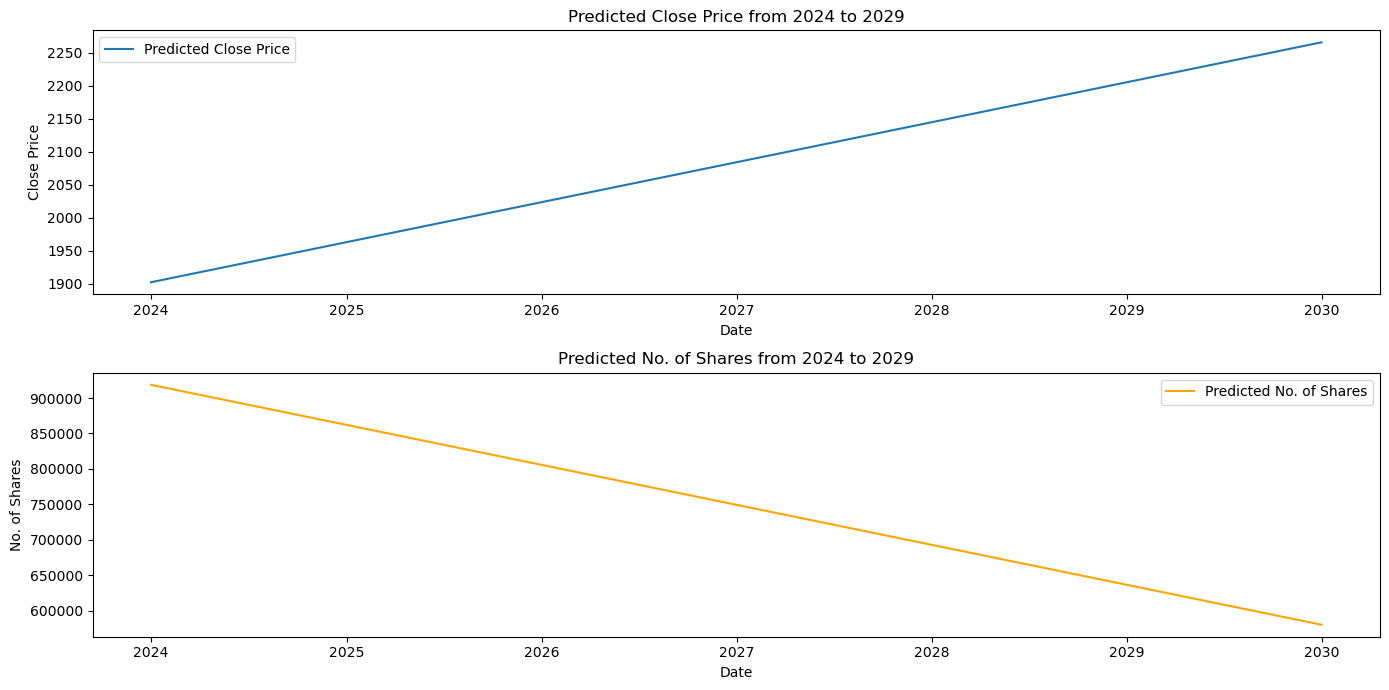

In [29]:
# Load the trained models
price_model = joblib.load('predict_close_price_model.pkl')
volume_model = joblib.load('predict_volume_model.pkl')

# Function to predict future values for Close Price
def predict_future_close_price(start_date, end_date):
    future_dates = pd.date_range(start=start_date, end=end_date, freq='D')
    future_dates_num = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
    future_pred_close = price_model.predict(future_dates_num)
    return pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_pred_close}).set_index('Date')

# Function to predict future values for No. of Shares
def predict_future_no_of_shares(start_date, end_date):
    future_dates = pd.date_range(start=start_date, end=end_date, freq='D')
    future_dates_num = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
    future_pred_shares = volume_model.predict(future_dates_num)
    return pd.DataFrame({'Date': future_dates, 'Predicted_Shares': future_pred_shares}).set_index('Date')

# Predicting future values for a given range
start_date = '2024-01-01'
end_date = '2029-12-31'

predicted_close_price = predict_future_close_price(start_date, end_date)
predicted_no_of_shares = predict_future_no_of_shares(start_date, end_date)

# Combine the predictions into a single DataFrame
predictions_combined = pd.concat([predicted_close_price, predicted_no_of_shares], axis=1)

# Display the first few rows of the predictions
print(predictions_combined.head())

# Plotting the results
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(predicted_close_price, label='Predicted Close Price')
plt.title('Predicted Close Price from 2024 to 2029')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(predicted_no_of_shares, label='Predicted No. of Shares', color='orange')
plt.title('Predicted No. of Shares from 2024 to 2029')
plt.xlabel('Date')
plt.ylabel('No. of Shares')
plt.legend()

plt.tight_layout()
plt.show()